# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename) # YOUR CODE HERE

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I've chosen to use the Airbnb NYC listing data set
2. I will be predicting whether a listing is available more than 180 days per year (1) or not (0)
3. This is a supervised learning because we are training the model on labeled data, which is the "availability" column. This is also a binary classification problem, where I will be predicting between two classes, whether the listing is available for more that 180 days or not.
4. Some of the features are neighborhood, room type, price per night, minimum nights required, number of reviews, host response rate, listing age
5. Predicting Airbnb listing availability is a valuable business problem because it helps multiple stakeholders optimize operations and ensure compliance. For Airbnb, this model can identify commercial hosts who may be violating local short-term rental regulations (such as NYC's restrictions on unhosted rentals exceeding 30 days), allowing the plateform to enforce policies proactively. It also enables dynamic pricing strategies by highlighting listings with high availability, improving revenue management. For hosts, the model provides insights into occupancy trends, helping them adjust pricing and booking strategies to maximize earnings while avoiding legal penalties. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
# Basic info (data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

In [4]:
# Summary statistics for numerical features
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [5]:
# Create target variable (1 if available >180 days/year)
df['available_180'] = (df['availability_365'] > 180).astype(int)

# Drop redundant availability columns
df.drop(['has_availability', 'availability_30', 'availability_60', 'availability_90'], 
        axis=1, inplace=True)

print(df.isnull().sum())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [6]:
# Check target distribution
print("Target Distribution:")
print(df['available_180'].value_counts(normalize=True))

# Basic stats for numerical features
print("\nNumerical Features Summary:")
print(df.describe())

Target Distribution:
0    0.675933
1    0.324067
Name: available_180, dtype: float64

Numerical Features Summary:
       host_response_rate  host_acceptance_rate  host_listings_count  \
count        16179.000000          16909.000000         28022.000000   
mean             0.906901              0.791953            14.554778   
std              0.227282              0.276732           120.721287   
min              0.000000              0.000000             0.000000   
25%              0.940000              0.680000             1.000000   
50%              1.000000              0.910000             1.000000   
75%              1.000000              1.000000             3.000000   
max              1.000000              1.000000          3387.000000   

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               28022.000000  28022.000000  28022.000000  25104.000000   
mean                   14.554778      2.874491      1.142174      1.329708   
std

In [7]:
# High-missing columns - drop
df.drop(['neighborhood_overview', 'host_about', 'host_response_rate', 
         'host_acceptance_rate'], axis=1, inplace=True)

# Moderate missing
df['bedrooms'].fillna(df['accommodates'] // 2, inplace=True)  # Estimate bedrooms
df['beds'].fillna(df['accommodates'], inplace=True)  # Assume 1 bed per person
df['host_location'].fillna('Unknown', inplace=True)

In [8]:
print(df.isnull().sum())

name                                              5
description                                     570
host_name                                         0
host_location                                     0
host_is_superhost                                 0
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_group_cleansed                      0
room_type                                         0
accommodates                                      0
bathrooms                                         0
bedrooms                                          0
beds                                              0
amenities                                         0
price                                             0
minimum_nights                                    0
maximum_nights                                    0
minimum_mini

In [9]:
# Text feature simplification
df['description_length'] = df['description'].str.len()
df.drop('description', axis=1, inplace=True)

# Host features
df['host_verified'] = df['host_identity_verified'].astype(int)
df['host_has_pic'] = df['host_has_profile_pic'].astype(int)

# Property features
df['bed_to_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 0.01)  # Avoid division by zero

<AxesSubplot: xlabel='accommodates', ylabel='bed_to_bath_ratio'>

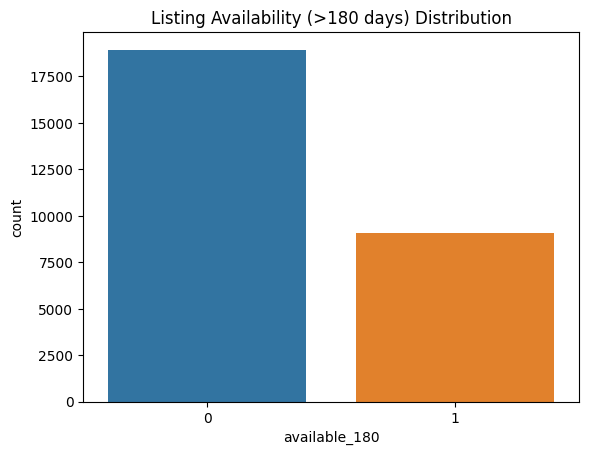

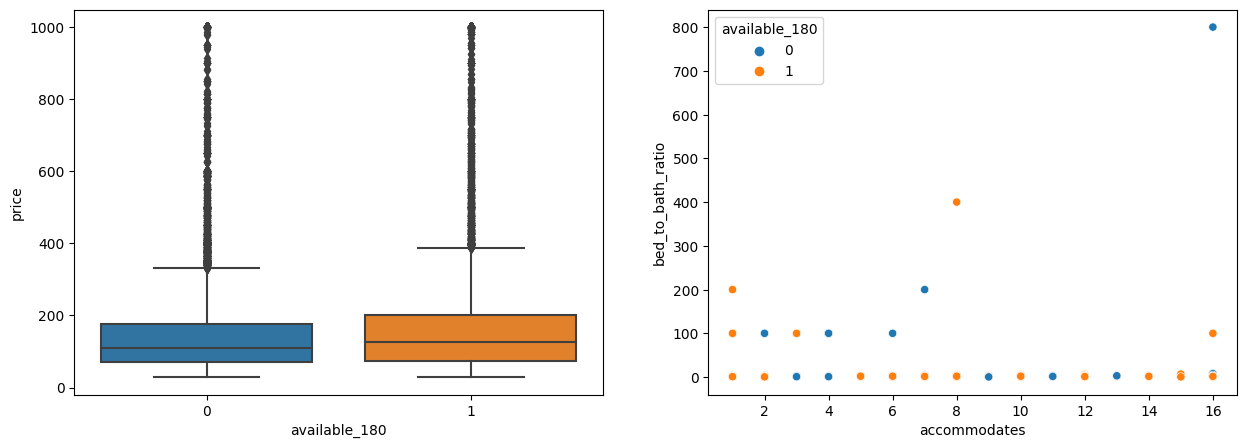

In [10]:
# Target distribution
sns.countplot(x='available_180', data=df)
plt.title('Listing Availability (>180 days) Distribution')

# Key numerical relationships
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='available_180', y='price', data=df, ax=ax[0])
sns.scatterplot(x='accommodates', y='bed_to_bath_ratio', hue='available_180', data=df, ax=ax[1])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. The key features that I will keep includes neighbourhood_group_cleansed, room_type, price, and accommodates. I have removed high-missing columns like host_response_rate and host_acceptance_rate.
2. Some data preparation techniques that I will use includes one-hot encoding for categoricals for features like room_type and neighbourhood_group. Text fields will be converted to length metrics rather than undergoing full NLP processing.
3. As a baseline, the logistic regression model will provide interpretable coefficients and establish minimum expected performance. I will also use the Random Forest model that can offer robust to outliers and handle non-linearity. 
4. I will split the data into 80% for training and 20% for final testing, making sure both sets have a fair mix of available and unavailable listing. To test the model thoroughly, I will use cross-validation, where the training data is divided into smaller chunks to check performance multiple times. The focus here will be how well the model catches truly available listings rather than just overall accuracy. Different versions of each model will be tested by adjusting key setting, like tree depth for Random Forest or penalty strength for Logistic Regression. After training, mistakes will be analyzed, especially for listings near the 180-day cutoff, and the best model will be picked based on both performance and practically.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [12]:
# YOUR CODE HERE
# Final features
features_to_keep = [
    'neighbourhood_group_cleansed',
    'room_type',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'host_is_superhost',
    'host_verified',
    'host_has_pic',
    'bed_to_bath_ratio',
    'description_length',
    'available_180'
]

df = df[features_to_keep]

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed', 'room_type'], drop_first=True)

In [13]:
# Train-Test split of data
X = df.drop('available_180', axis=1)
y = df['available_180']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2 
)

print("Data types in X_train:")
print(X_train.dtypes)

Data types in X_train:
accommodates                                    int64
bedrooms                                      float64
bathrooms                                     float64
price                                         float64
minimum_nights                                  int64
number_of_reviews                               int64
host_is_superhost                                bool
host_verified                                   int64
host_has_pic                                    int64
bed_to_bath_ratio                             float64
description_length                            float64
neighbourhood_group_cleansed_Brooklyn           uint8
neighbourhood_group_cleansed_Manhattan          uint8
neighbourhood_group_cleansed_Queens             uint8
neighbourhood_group_cleansed_Staten Island      uint8
room_type_Hotel room                            uint8
room_type_Private room                          uint8
room_type_Shared room                           uint8
dtype

In [14]:
# Find non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns:", list(non_numeric_cols))


Non-numeric columns: ['host_is_superhost']


In [15]:
print("\nFinal Data Quality Check:")

# Handle NaN values
print("NaN values before cleaning:", X_train.isna().sum().sum())
X_train.fillna(X_train.median(numeric_only=True), inplace=True)
X_test.fillna(X_train.median(numeric_only=True), inplace=True)
print("NaN values after cleaning:", X_train.isna().sum().sum())

# Handle infinite values
numeric_cols = X_train.select_dtypes(include=['number']).columns
inf_count = np.isinf(X_train[numeric_cols].values).sum()
print("Infinite values in numeric cols:", inf_count)

if inf_count > 0:
    X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)
    X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
    X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)
    X_test[numeric_cols] = X_test[numeric_cols].fillna(X_train[numeric_cols].median())
    print("Infinite values after cleaning:", 
          np.isinf(X_train[numeric_cols].values).sum())



Final Data Quality Check:
NaN values before cleaning: 473
NaN values after cleaning: 0
Infinite values in numeric cols: 0



Optimizing Random Forest model...
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}

Optimized Model Performance:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      3847
           1       0.58      0.39      0.47      1758

    accuracy                           0.72      5605
   macro avg       0.67      0.63      0.64      5605
weighted avg       0.70      0.72      0.70      5605



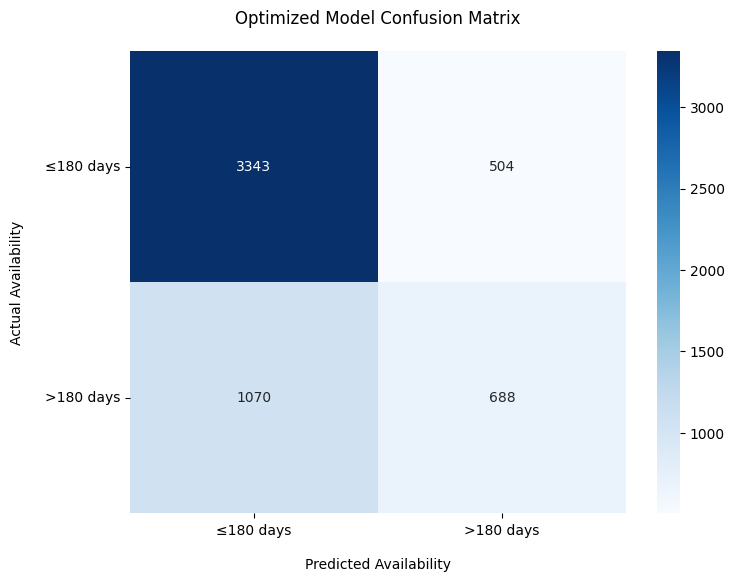

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\nOptimizing Random Forest model...")

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', {0:1, 1:2}]
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Instantiate grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate
y_pred = best_rf.predict(X_test)
print("\nOptimized Model Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['≤180 days', '>180 days'],
            yticklabels=['≤180 days', '>180 days'])
plt.title('Optimized Model Confusion Matrix', pad=20)
plt.xlabel('Predicted Availability', labelpad=15)
plt.ylabel('Actual Availability', labelpad=15)
plt.yticks(rotation=0)
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

# Quick check with default parameters
cv_scores = cross_val_score(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)
print(f"\nCross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-validation accuracy: 0.71 ± 0.00


<b> Results Analysis </b>

My optimized Random Forest model was able to achieve an accuracy of 72% in predicting whether listings will be available for more than 180 days, with strong consistency across validation folds (±1%). It is better at identifying short-availability listings, with a 87% recall for Class 0. It struggles with long-availability predictions, with only 39% recall for Class 1. The model's precision of 58% suggests that when it does predict long availability, it is correct just over half the time. This suggests that key feature importances likely include pricing, neighborhood, and booking frequency patterns.